<hr style="height:10px"> 
 
<div class='container2'>
		<div>
			<img src='images\IAheader.jpeg' ALIGN='left' style='width:10em'>
		</div>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2025/2 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial - Análise Exploratória de Dados </b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Projeto de Ciência de Dados - <a href="https://www.kaggle.com/datasets/gargmanas/pima-indians-diabetes">Pima Indians Dataset </a> </h2>

Notebook desenvolvido por: <a href="http://github.com/Lucascintra08">Lucas Cintra Melo</a>

 <hr style="height:2px"> 

## 1. Bibliotecas Necessárias para o Notebook

Para este notebook, serâo utilizadas as seguintes bibliotecas:

* [`matplotlib`](https://matplotlib.org/) (versão 3.1.3 ou superior): construção e exibição de gráficos variados (estático).
* [`seaborn`](https://seaborn.pydata.org/) (versão 0.10.0 ou superior): construção e exibição de gráficos variados (dinâmicos).
* [`numpy`](https://numpy.org) (versão 1.16.2 ou superior): manipulação de dados em formato de vetores e matrizes.
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (versão 0.24.1 ou superior): manipulação de dados em formato de tabelas.
* [`sklearn`](https://scikit-learn.org/stable/)(versão 1.1.3 ou superior): construção do modelo de predição

Será utilizado o conjunto de dados que se encontra no diretório `datasets`, em formato de arquivo `.csv e/ou .txt`.

---
## 2. Carregar e Exibir os Dados da Fonte

Primeiro, vamos importar todas as bibliotecas que serão utilizadas no projeto.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


### Apresentação da base de dados

A base de dados Pima Indians será usada para fazer uma predição do diagnóstico de diabetes de certo paciente.

In [2]:
colunas = [
    "Numero_Gravidezes", 
    "Glucose", 
    "Pressao_Sanguinea", 
    "Espessura_Da_Pele", 
    "Insulina", 
    "Indice_Massa_corporal", 
    "Diabetes_Pedigree", 
    "Idade", 
    "Resultado"
]

# carregar o dataset de diabetes
df_dataset = pd.read_csv("datasets/pima-indians-diabetes.csv", header=None, names=colunas)

print("Dados importados com sucesso!")

Dados importados com sucesso!


In [3]:
# exibir primeiras linhas
display(df_dataset.head())

,Numero_Gravidezes,Glucose,Pressao_Sanguinea,Espessura_Da_Pele,Insulina,Indice_Massa_corporal,Diabetes_Pedigree,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
## 3. Pré-processamento

Minimizar ou eliminar problemas existentes em um conjunto de dados, bem como torná-los mais adequados para sua utilização por um determinado algoritmo de aprendizagem de máquina.

Nesse dataset todos os atributos são relevantes para a análise dos dados e para gerar uma melhor predição para o diagnóstico do paciente, então não removeremos nenhum de seus atributos.

In [4]:
print("\nAtributos disponíveis:", df_dataset.columns.tolist())


Atributos disponíveis: ['Numero_Gravidezes', 'Glucose', 'Pressao_Sanguinea', 'Espessura_Da_Pele', 'Insulina', 'Indice_Massa_corporal', 'Diabetes_Pedigree', 'Idade', 'Resultado']


## 3.1 Tratamento de atributos com valores ausentes

Verificar se existem atributos com valores ausentes (NaN) na base de dados.

Neste dataset, alguns atributos possuem 0 em variáveis que não podem ser zero (ex: pressão, insulina, IMC). Vamos tratar isso como valores ausentes (NaN).

In [5]:
cols_with_invalid_zeros = [
    "Glucose",  "Pressao_Sanguinea", "Espessura_Da_Pele", "Insulina", "Indice_Massa_corporal"
]

# substituir zeros por NaN
df_dataset[cols_with_invalid_zeros] = df_dataset[cols_with_invalid_zeros].replace(0, np.nan)

# mostrar linhas com valores ausentes
idxRowNan = pd.isnull(df_dataset).any(axis=1).to_numpy().nonzero()
print("\n\033[1mLinhas com valores ausentes:\033[0m")
display(df_dataset.iloc[idxRowNan])

# preencher valores ausentes com a média da coluna
df_dataset.fillna(df_dataset.mean(), inplace=True)


Linhas com valores ausentes:


,Numero_Gravidezes,Glucose,Pressao_Sanguinea,Espessura_Da_Pele,Insulina,Indice_Massa_corporal,Diabetes_Pedigree,Idade,Resultado
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


---
## 3.2 Tratamento de dados inconsistentes ou redundantes

Verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há registros representados por atributos com todos os valores iguais, mas com diagnóstico diferentes. A redundância é dada pela repetição de linhas na base de dados.

In [6]:
df_duplicates = df_dataset[df_dataset.duplicated(keep=False)]

if len(df_duplicates) > 0:
    print("\nObjetos duplicados encontrados:")
    display(df_duplicates)
    # remover duplicados
    df_dataset = df_dataset.drop_duplicates(keep="first")
else:
    print("\nNão existem registros duplicados!")


Não existem registros duplicados!


---
## 4. Análise dos Dados
A análise das características presentes em um conjunto de dados permite a descoberta de padrões e tendências que podem fornecer informações valiosas para compreender o processo que gerou os dados.

In [7]:
# estatísticas descritivas
df_detalhes = df_dataset.describe()
print("\n\033[1mEstatísticas descritivas:\033[0m")
display(df_detalhes)


Estatísticas descritivas:


,Numero_Gravidezes,Glucose,Pressao_Sanguinea,Espessura_Da_Pele,Insulina,Indice_Massa_corporal,Diabetes_Pedigree,Idade,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


---
## 4.1 Detecção de outliers (valor atípico)
Faremos essa detecção por meio do `Gráfico Box Plot` uma das maneiras mais simples de verificar se os dados contém outliers.

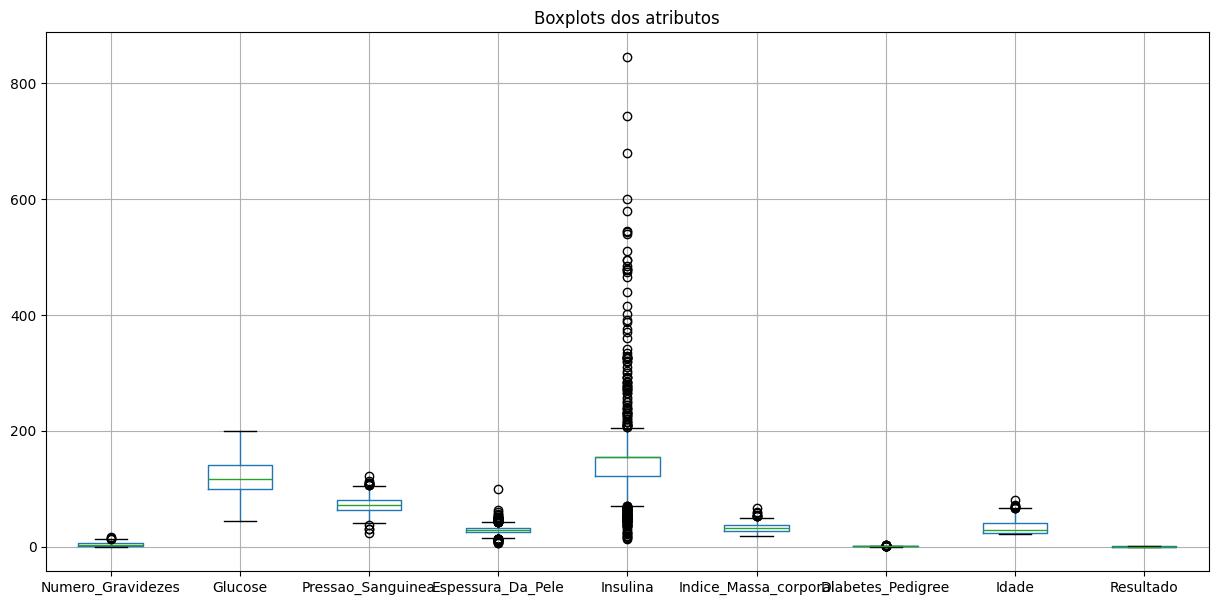

In [8]:
# gerar um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.title("Boxplots dos atributos")
plt.show()

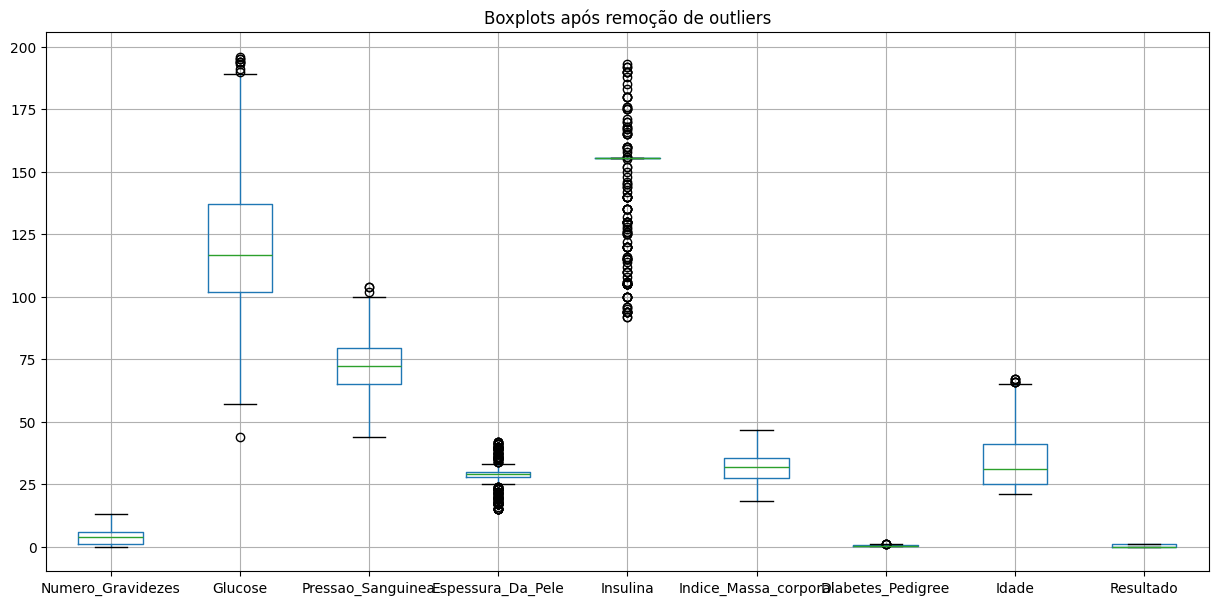

In [9]:
# função para remover outliers pelo método do IQR
def removeOutliers(df_dataset):
    for atributo in df_dataset.columns[:-1]:  # excluir a coluna de classe ("Outcome")
        q75, q25 = np.percentile(df_dataset[atributo].values, [75, 25])
        IQR = q75 - q25
        df_dataset = df_dataset[
            (df_dataset[atributo] <= (q75 + 1.5 * IQR)) &
            (df_dataset[atributo] >= (q25 - 1.5 * IQR))
        ]
    return df_dataset

# remover outliers
df_dataset = removeOutliers(df_dataset)

# boxplots novamente após limpeza
df_dataset.boxplot(figsize=(15,7))
plt.title("Boxplots após remoção de outliers")
plt.show()

---
## 5. Predição do Diagnóstico
Agora faremos uma predição para um novo paciente, com valores escolhidos para cada coluna.

In [10]:
# Agora o dataset está limpo e pronto para modelagem.
# A coluna alvo é "Resultado" (0 = não diabético, 1 = diabético).
print("\nClasse alvo:", df_dataset['Resultado'].unique())


Classe alvo: [1 0]


## 5.1 Modelagem Preditiva
Aqui começa a parte de aprendizado de máquina, em que usamos os dados tratados para treinar e avaliar um modelo.

In [11]:
# importações
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# separar features (X) e alvo (y)
X = df_dataset.drop(columns=["Resultado"])
y = df_dataset["Resultado"]

# dividir em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5.2 Treinamento do modelo
Cria e treina um modelo de `Regressão Logística`.

In [12]:
modelo = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
modelo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## 5.3 Avaliação do modelo
O modelo gera previsões no conjunto de teste, mostra a sua acurácia, o relatório de classificação e a sua matriz de confusão.


Acurácia do modelo: 0.7697841726618705

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        91
           1       0.67      0.65      0.66        48

    accuracy                           0.77       139
   macro avg       0.75      0.74      0.74       139
weighted avg       0.77      0.77      0.77       139



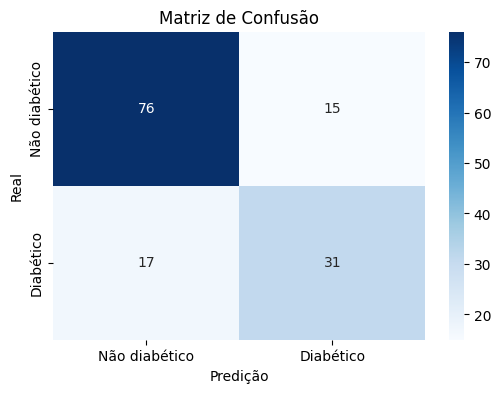

In [13]:
y_pred = modelo.predict(X_test)

print("\n\033[1mAcurácia do modelo:\033[0m", accuracy_score(y_test, y_pred))
print("\n\033[1mRelatório de classificação:\033[0m\n", classification_report(y_test, y_pred))

# Gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Define os rótulos
labels = ["Não diabético", "Diabético"]

# Plota a matriz
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

## 5.4 Predição para um novo paciente
Uso do modelo para prever o diagnóstico de um paciente novo.

In [14]:
# exemplo de paciente (valores fictícios)
novo_paciente = pd.DataFrame([{
    "Numero_Gravidezes": 5, 
    "Glucose": 120, 
    "Pressao_Sanguinea": 70, 
    "Espessura_Da_Pele": 20, 
    "Insulina": 79, 
    "Indice_Massa_corporal": 25.5, 
    "Diabetes_Pedigree": 0.35, 
    "Idade": 30
}])
# colunas: Gravidezes, Glucose, PressãoSanguínea, FinuraPele, Insulina, IndiceMassaCorporal, DiabetesPedigree, Idade

# aplicar o mesmo scaler
novo_paciente_escalado = scaler.transform(novo_paciente)

# predição
predicao = modelo.predict(novo_paciente_escalado)

print("Predição para o novo paciente:", "DIABÉTICO" if predicao[0] == 1 else "NÃO DIABÉTICO")

Predição para o novo paciente: NÃO DIABÉTICO
